# Loading and Exploring Log LAS Files With Python

The accompanying video for this notebook can be found on my YouTube channel at:  
Please check it out, like and subscribe.

## Introduction

Log ASCII Standard (LAS) files are a common Oil & Gas industry format for storing and transferring well log data. 

A LAS file is a structured file format that was developed in the late 1980s and early 1990s by the Canadian Well Logging Society and it is used to store log curve data as well as information about the well. The format makes it simple to transfer well log data between people and it is easy to explore these files as they are stored within plain text.

This notebook illustrates how to load data in from a LAS file and carry out a basic QC of the data before plotting it on a log plot.

## Loading and Checking Data
The first step is to import the required libraries: pandas, matplotlib and LASIO.  
lasio is a library that has been developed to handle and work with LAS files. More info on the library can be found at: https://lasio.readthedocs.io/en/latest/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

To load our file in, we can use the `.read()` method from LASIO like so:

In [7]:
las = lasio.read(file_ref="Data/15-9-19_SR_COMP.LAS")

In [32]:
# print(las.version)     # dict-like
# print(las.well)
print(las.curves)
# print(las.params)
# print(las.other)

Mnemonic  Unit  Value         Description                       
--------  ----  -----         -----------                       
DEPT      M     00 001 00 00  1  DEPTH                          
AC        US/F                2  Sonic Transit Time (Slowness)  
CALI      IN                  3  Caliper                        
DEN       G/CC                4  Bulk Density                   
GR        GAPI                5  Gamma Ray                      
NEU       %                   6  Neutron Porosity               
RDEP      OHMM                7  Deep Resistivity               


In [8]:
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [9]:
las.sections['Version']

[HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS Log ASCII Standa"),
 HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One line per depth ste")]

In [33]:
las.sections['Curves']

[CurveItem(mnemonic="DEPT", unit="M", value="00 001 00 00", descr="1  DEPTH", original_mnemonic="DEPT", data.shape=(6701,)),
 CurveItem(mnemonic="AC", unit="US/F", value="", descr="2  Sonic Transit Time (Slowness)", original_mnemonic="AC", data.shape=(6701,)),
 CurveItem(mnemonic="CALI", unit="IN", value="", descr="3  Caliper", original_mnemonic="CALI", data.shape=(6701,)),
 CurveItem(mnemonic="DEN", unit="G/CC", value="", descr="4  Bulk Density", original_mnemonic="DEN", data.shape=(6701,)),
 CurveItem(mnemonic="GR", unit="GAPI", value="", descr="5  Gamma Ray", original_mnemonic="GR", data.shape=(6701,)),
 CurveItem(mnemonic="NEU", unit="%", value="", descr="6  Neutron Porosity", original_mnemonic="NEU", data.shape=(6701,)),
 CurveItem(mnemonic="RDEP", unit="OHMM", value="", descr="7  Deep Resistivity", original_mnemonic="RDEP", data.shape=(6701,))]

Now that our file has been loaded, we can start investigating it's contents.

To find information out about where the file originated from, such as the well name, location and what the depth range of the file covers, we can create a simple for loop to go over each header item. Using Python's f-string we can join the items together.

In [10]:
for item in las.sections['Well']:
    print(f"{item.descr} ({item.mnemonic}): \t\t {item.value}")

Top Depth (STRT): 		 102.1568
Bottom Depth (STOP): 		 4636.514
Depth Increment (STEP): 		 0.1524
Null Value (NULL): 		 -999.25
Field Name (FLD): 		 Q15
NAME (WELL): 		 15/9-19
WELLBORE (WBN): 		 15/9-19 SR
COUNTRY (NATI): 		 NOR
COUNTRY (CTRY): 		 NOR
OPERATOR (COMP): 		 STATOIL
PERM DATUM (PDAT): 		 MSL
RIG NAME (COUN): 		 NORTH SEA
STATE (STAT): 		 NORWAY
PB WELL ID (PBWE): 		 15/9-19
PB WELLBORE ID (APIN): 		 15/9-19 SR
PB WELL NAME SET (PBWS): 		 ALL


We can see above that we have the key information about the well, such as the name and location.

If we wanted to change one of these entries, for example, COUNTRY (CTRY), we can easily do that by using the following line of code.

In [11]:
las.sections['Well']['CTRY'] = 'Norway'

We can now see that if we run the code again the COUNTRY value is updated.

In [12]:
for item in las.sections['Well']:
    print(f"{item.descr} ({item.mnemonic}): \t\t {item.value}")

Top Depth (STRT): 		 102.1568
Bottom Depth (STOP): 		 4636.514
Depth Increment (STEP): 		 0.1524
Null Value (NULL): 		 -999.25
Field Name (FLD): 		 Q15
NAME (WELL): 		 15/9-19
WELLBORE (WBN): 		 15/9-19 SR
COUNTRY (NATI): 		 NOR
COUNTRY (CTRY): 		 Norway
OPERATOR (COMP): 		 STATOIL
PERM DATUM (PDAT): 		 MSL
RIG NAME (COUN): 		 NORTH SEA
STATE (STAT): 		 NORWAY
PB WELL ID (PBWE): 		 15/9-19
PB WELLBORE ID (APIN): 		 15/9-19 SR
PB WELL NAME SET (PBWS): 		 ALL


We can also call upon the sections in a different way.
In this case we can use `las.well` to call upon the well section.

If we just want to extract the Well Name, we can simply call it by using the following:

In [13]:
las.well.WELL.value

'15/9-19'

To quickly see what curve mnemonics are present within the las file we can loop through `las.curves` and print the mnemonic.

In [14]:
for curve in las.curves:
    print(curve.mnemonic)

DEPT
AC
CALI
DEN
GR
NEU
RDEP
RMED


To see what curves are present within the las file, we can repeat the process with the Curve Item object and call upon the `unit` and `descr` functions to get info on the units and the curve's description.
The enumerate function allows us to keep a count of the number of curves that are present within the file. As enumerate returns a 0 on the first loop, we need to 1 to it if we want to include the depth curve.

In [ ]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPT, 	 Units: M, 	 Description: 1  DEPTH
Curve: AC, 	 Units: US/F, 	 Description: 2  Sonic Transit Time (Slowness)
Curve: CALI, 	 Units: IN, 	 Description: 3  Caliper
Curve: DEN, 	 Units: G/CC, 	 Description: 4  Bulk Density
Curve: GR, 	 Units: GAPI, 	 Description: 5  Gamma Ray
Curve: NEU, 	 Units: %, 	 Description: 6  Neutron Porosity
Curve: RDEP, 	 Units: OHMM, 	 Description: 7  Deep Resistivity
Curve: RMED, 	 Units: OHMM, 	 Description: 8  Medium Resistivity
There are a total of: 8 curves present within this file


Curves can easily be removed from the LAS file. For example, if we do not whish to retain the RMED curve, we can remove it like so:

In [16]:
las.delete_curve('RMED')

In [17]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPT, 	 Units: M, 	 Description: 1  DEPTH
Curve: AC, 	 Units: US/F, 	 Description: 2  Sonic Transit Time (Slowness)
Curve: CALI, 	 Units: IN, 	 Description: 3  Caliper
Curve: DEN, 	 Units: G/CC, 	 Description: 4  Bulk Density
Curve: GR, 	 Units: GAPI, 	 Description: 5  Gamma Ray
Curve: NEU, 	 Units: %, 	 Description: 6  Neutron Porosity
Curve: RDEP, 	 Units: OHMM, 	 Description: 7  Deep Resistivity
There are a total of: 7 curves present within this file


In [18]:
las.write('Exports/15_9-19_Exported.las')

## Converting LAS File to a Pandas Dataframe
Data loaded in using LASIO can be converted to a pandas dataframe using the .df() function. This allows us to easily plot data and pass it into one of the many machine learning algorithms.

In [19]:
well = las.df()

The `.head()` function generates a table view of the header and the first 5 rows within the dataframe.

In [35]:
well.head(50)

,AC,CALI,DEN,GR,NEU,RDEP
DEPT,,,,,,
3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941
3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367
3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423
3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571
3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442
3616.1960,101.3599,11.1429,2.2043,34.5944,33.7486,0.7461
3616.3484,101.7746,10.2602,2.2558,30.2169,25.1014,0.7584
3616.5008,93.5910,10.0952,2.3477,32.7352,15.9389,0.9299
3616.6532,86.7889,10.4122,2.4238,30.3098,14.3046,1.1877


To find out more information about data, we can call upon the `.info()` and `.describe()` functions.  
    
The `.info()` function provides information about the data types and how many non-null values are present within each curve.  
The `.describe()` function, provides statistical information about each curve and can be a useful QC for each curve.

In [21]:
well.describe()

,AC,CALI,DEN,GR,NEU,RDEP
count,6579.000000,6579.000000,6656.000000,6689.000000,6668.000000,6701.000000
mean,78.313607,9.550656,2.459291,36.048563,17.986061,3.221012
std,17.009535,0.906267,0.162682,26.705519,11.694084,8.860387
min,1.025100,6.000000,2.037700,2.766100,2.178300,0.250300
25%,66.169300,9.142900,2.341250,14.852300,10.244475,0.800600
50%,74.145900,9.523800,2.514200,32.142600,15.245100,1.770000
75%,89.024250,9.904800,2.589800,50.901700,22.952525,3.394000
max,149.218700,20.285700,3.001300,304.333700,146.347400,198.537100


In [22]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6701 entries, 3615.434 to 4636.514
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      6579 non-null   float64
 1   CALI    6579 non-null   float64
 2   DEN     6656 non-null   float64
 3   GR      6689 non-null   float64
 4   NEU     6668 non-null   float64
 5   RDEP    6701 non-null   float64
dtypes: float64(6)
memory usage: 366.5 KB


### Quick Plot

Using the ploting function within pandas, we can plot all curves on a single plot.

<Axes: xlabel='DEPT'>

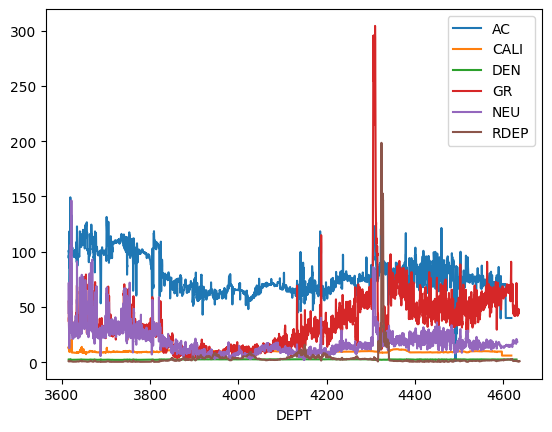

In [23]:
well.plot()

When we look at the plot above, we can see that is not very useful to us as all logging measurements have their own scales. We can see that RDEP, which is Deep Resistivity is very flat. That is becuase it is notmally plotted on a logarithmich scale. Similary, density (DEN) is also not easily distinguisable due to its small range (1.5 g/cc to 3g/cc).

We can plot individual curves by supplying a y variable argument like so:

<Axes: title={'center': 'GR VS Depth'}, xlabel='Depth', ylabel='Gama Ray'>

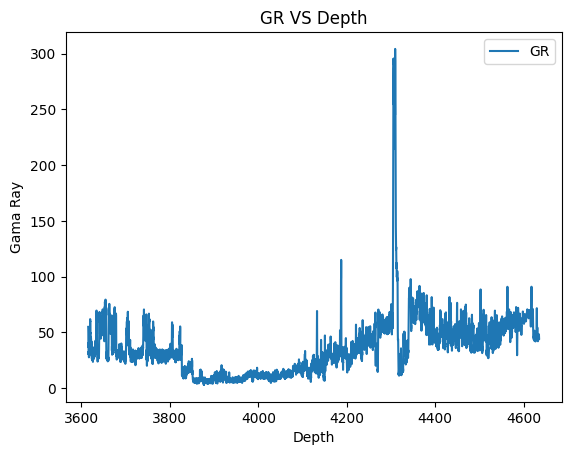

In [39]:
well.plot(y='GR', title="GR VS Depth", xlabel='Depth', ylabel="Gama Ray")

This allows us to view the Gamma Ray Curve on its own. We can change the variable to any other curve within the dataframe and view it as follows: 

<Axes: xlabel='DEPT'>

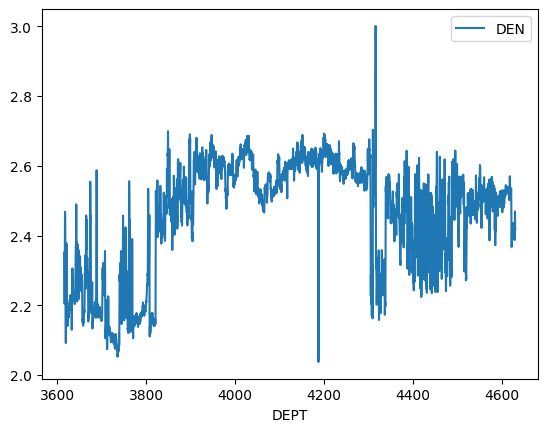

In [25]:
well.plot(y='DEN')